In [1]:
import warnings
warnings.filterwarnings("ignore")
#loading useful libraries
import pandas as pd
import os
import pickle
from dataset import apply_stratified_framework, get_targets

from plot import plot_PRC, plot_roc
from test_models import get_results

In [2]:
try:
    os.mkdir('plots')
except OSError as exc:
    pass

In [3]:
testB= pd.read_csv("testB_submit.csv")

In [4]:
complications = [ 'SBI', 'AKI','ARDS']

In [5]:
framework_test = apply_stratified_framework(testB, complications)

In [6]:
train_columns = ['Diastolic Blood Pressure_max','Diastolic Blood Pressure_mean', 'Diastolic Blood Pressure_min', 'Oxygen Saturation_max', 'Oxygen Saturation_mean', 'Oxygen Saturation_min', 'Peripheral Pulse Rate_max', 'Peripheral Pulse Rate_mean', 'Peripheral Pulse Rate_min', 'Respiratory Rate_max', 'Respiratory Rate_mean', 'Respiratory Rate_min', 'Systolic Blood Pressure_max', 'Systolic Blood Pressure_mean', 'Systolic Blood Pressure_min', 'Temperature Axillary_max', 'Temperature Axillary_mean', 'Temperature Axillary_min', 'GCS_mean', 'GCS_min', 'GCS_max','GENDER','AGE', 'COUGH', 'FEVER', 'SOB', 'SORE_THROAT', 'RASH', 'BMI', 'DIABETES', 'HYPERTENSION', 'CKD', 'CANCER']

loading trained models from "Trained models" folder

In [8]:
trained_models = {}
for c in complications:
    models_for_complication= []
    for i in range(6):
        pkl_filename = "../trained models/"+c+"_"+str(i)+"_trained_on_B.pkl"
        with open(pkl_filename, 'rb') as file:
                    pickle_model = pickle.load(file)
        models_for_complication.append(pickle_model)
    models_for_complication
    trained_models[c]= models_for_complication

get performance results of our trained models on the sample data

In [9]:
true_ouctomes, predicted_ouctomes = get_results(framework_test, complications, trained_models, train_columns)

predicting SBI
AUPRC
CI 95% 0.387 ( 0.19 , 0.616 )
AUC 
CI 95% 0.859 ( 0.77 , 0.934 )
Calcualing 95% Confidence Intervals
-------------------------------------------
predicting AKI
AUPRC
CI 95% 0.387 ( 0.139 , 0.685 )
AUC 
CI 95% 0.891 ( 0.81 , 0.957 )
Calcualing 95% Confidence Intervals
-------------------------------------------
predicting ARDS
AUPRC
CI 95% 0.399 ( 0.166 , 0.731 )
AUC 
CI 95% 0.827 ( 0.658 , 0.964 )
Calcualing 95% Confidence Intervals
-------------------------------------------


# Get ROC, PR and Calibration curves

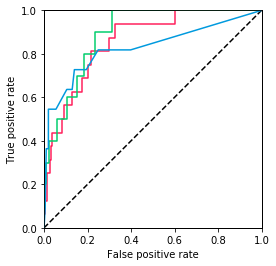

In [10]:
plot_roc(complications, true_ouctomes, predicted_ouctomes,"setB")

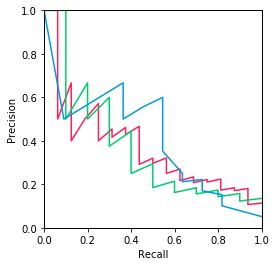

In [11]:
plot_PRC(complications, true_ouctomes, predicted_ouctomes,"setB")